In [14]:

pip install psycopg2

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------- ----------------- 0.6/1.2 MB 13.8 MB/s eta 0:00:01
   ------------------------------------- -- 1.1/1.2 MB 10.0 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.2 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.2 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
import pandas as pd
from datetime import datetime
from config import KEY

# Replace 'YOUR_API_KEY' with your own AlphaVantage API key
API_KEY = KEY

# List of stock symbols you want to retrieve data for
symbols = ['AAPL', 'GOOGL', 'MSFT']

# List to store individual DataFrames for each stock
dfs = []

for symbol in symbols:
    # AlphaVantage API URL to get stock data
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={API_KEY}'

    # Make a GET request to the API
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()['Time Series (Daily)']
        # Convert the JSON object to a Pandas DataFrame
        df = pd.DataFrame.from_dict(data, orient='index')
        # Rename the columns
        df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
        # Convert values to numeric types
        df = df.apply(pd.to_numeric)
        
        # Add the stock symbol column
        df['Symbol'] = symbol
        
        # Add the update date column
        df['Fecha_Actualizacion'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        
        # Add the date column
        df['Fecha'] = df.index
        
        # Add a primary key and index column
        df['Primary_Key'] = df['Symbol'] + ' ' + df.index
        
        # Reorder the columns
        df = df[['Fecha', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume', 'Fecha_Actualizacion', 'Primary_Key']]
        
        # Add the DataFrame for this stock to the list
        dfs.append(df)
        
    else:
        print(f"Error retrieving data for {symbol}: {response.status_code}")

# Combine all DataFrames into a single one
combined_df = pd.concat(dfs)

# Display the combined DataFrame
combined_df

,Fecha,Symbol,Open,High,Low,Close,Volume,Fecha_Actualizacion,Primary_Key
2024-04-10,2024-04-10,AAPL,168.800,169.090,167.11,167.78,49439047,2024-04-10 21:50:44,AAPL 2024-04-10
2024-04-09,2024-04-09,AAPL,168.700,170.080,168.35,169.67,42231444,2024-04-10 21:50:44,AAPL 2024-04-09
2024-04-08,2024-04-08,AAPL,169.030,169.200,168.24,168.45,37216858,2024-04-10 21:50:44,AAPL 2024-04-08
2024-04-05,2024-04-05,AAPL,169.590,170.390,168.95,169.58,41975776,2024-04-10 21:50:44,AAPL 2024-04-05
2024-04-04,2024-04-04,AAPL,170.290,171.920,168.82,168.82,53355055,2024-04-10 21:50:44,AAPL 2024-04-04
...,...,...,...,...,...,...,...,...,...
2023-11-21,2023-11-21,AAPL,191.410,191.520,189.74,190.64,38134485,2024-04-10 21:50:44,AAPL 2023-11-21
2023-11-20,2023-11-20,AAPL,189.890,191.905,189.88,191.45,46538614,2024-04-10 21:50:44,AAPL 2023-11-20
2023-11-17,2023-11-17,AAPL,190.250,190.380,188.57,189.69,50941404,2024-04-10 21:50:44,AAPL 2023-11-17
2023-11-16,2023-11-16,AAPL,189.570,190.960,188.65,189.71,54412915,2024-04-10 21:50:44,AAPL 2023-11-16


In [ ]:
import psycopg2
from config import dbname, user, clave, host, port2  # Import credentials from a config.py file

# Establish connection with the database
conn = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=clave,
    host=host,
    port=port2
)

# Create a cursor to execute SQL queries
cur = conn.cursor()

# SQL query to delete all data from the Mercado_Bursatil table
sql_delete_all = "DELETE FROM Mercado_Bursatil;"

# Execute the query to delete all data
cur.execute(sql_delete_all)

# SQL query to insert data into the Mercado_Bursatil table
sql_insert = "INSERT INTO Mercado_Bursatil VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s);"

# Assuming you have a DataFrame called combined_df with the data to insert
for index, row in combined_df.iterrows():
    # Execute the insert query with values from the current row
    cur.execute(sql_insert, (row['Fecha'], row['Symbol'], row['Open'], row['High'], row['Low'], row['Close'],
                             row['Volume'], row['Fecha_Actualizacion'], row['Primary_Key']))

# Commit changes to the database
conn.commit()

# Close the cursor and database connection
cur.close()
conn.close()

In [20]:
pip install mpl_finance

Note: you may need to restart the kernel to use updated packages.


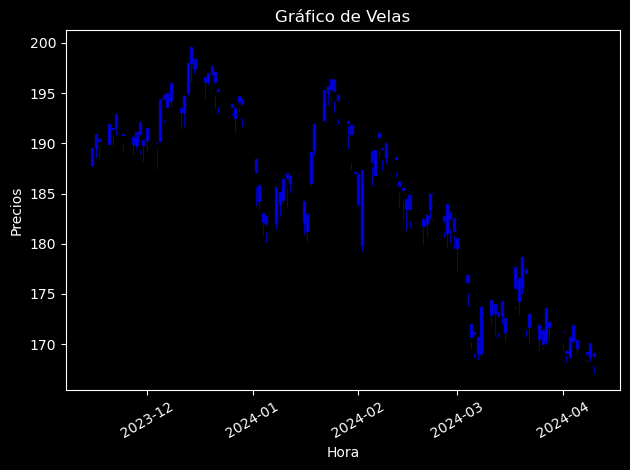

In [ ]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ochl
import matplotlib.dates as mdates

# Reorder columns if not already done
df = df[['Fecha', 'Open', 'High', 'Low', 'Close']]

# Convert the 'Fecha' column to datetime format if it's not already
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Convert DataFrame to a list of lists for use with candlestick_ochl
ohlc_data = df[['Fecha', 'Open', 'High', 'Low', 'Close']].values.tolist()

plt.style.use("dark_background")

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.2)

# Convert dates to integer format for use with candlestick_ochl
ohlc_data_int = [(mdates.date2num(date), open_, high, low, close) for date, open_, high, low, close in ohlc_data]

candlestick_ochl(ax, ohlc_data_int, width=0.6, colorup='blue', colordown='red', alpha=0.7)

# Configure axes and labels
ax.xaxis_date()
plt.xticks(rotation=30)
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Candlestick Chart')
plt.tight_layout()
plt.show()
